# Top Scorer

In [11]:
%config IPCompleter.greedy=True

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

In [13]:
cricket = pd.read_excel('C:/Users/g7x0302/Desktop/Excel/Cricket Challenge/Master Data.xlsx')
cricket.head()

,S.N.,Player,category,Match,Innings,NO,Runs,HS,Avg,BF,SR,100,200,50,4s,6s
0,1,Rohit Sharma,Batsman,201,195,31,7808,264,47.61,8840,88.33,22,3,39,681,215.0
1,2,Sikhar Dhawan,Batsman,123,122,7,5178,137,45.03,5539,93.48,15,0,27,642,64.0
2,3,Virat Kohli,Captain,222,214,37,10533,183,59.51,11376,92.59,39,0,49,984,115.0
3,4,Ambati Rayudu,Batsman,52,47,14,1661,124,50.33,2084,79.70,3,0,10,141,30.0
4,5,Lokesh Rahul,Batsman,13,12,3,317,100,35.22,393,80.66,1,0,2,25,5.0


In [14]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 16 columns):
S.N.        31 non-null int64
Player      31 non-null object
category    31 non-null object
Match       31 non-null int64
Innings     31 non-null int64
NO          31 non-null int64
Runs        31 non-null int64
HS          31 non-null int64
Avg         31 non-null float64
BF          31 non-null int64
SR          31 non-null float64
100         31 non-null int64
200         31 non-null int64
50          31 non-null int64
4s          31 non-null int64
6s          30 non-null float64
dtypes: float64(3), int64(11), object(2)
memory usage: 4.0+ KB


In [15]:
cricket.describe()

,S.N.,Match,Innings,NO,Runs,HS,Avg,BF,SR,100,200,50,4s,6s
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,30.000000
mean,16.000000,57.451613,45.322581,8.774194,1572.935484,73.967742,25.977742,1745.032258,82.694194,3.580645,0.096774,8.516129,144.387097,30.866667
std,9.092121,75.321462,69.685191,15.976461,2941.064228,64.826170,16.901683,3267.520563,26.181330,8.401485,0.538816,16.564764,265.188446,58.519512
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.500000,10.000000,6.000000,1.000000,53.500000,23.000000,11.595000,65.000000,72.285000,0.000000,0.000000,0.000000,5.500000,1.000000
50%,16.000000,39.000000,15.000000,3.000000,246.000000,47.000000,27.670000,295.000000,83.840000,0.000000,0.000000,0.000000,20.000000,3.000000
75%,23.500000,61.000000,47.000000,9.000000,1331.500000,111.000000,39.455000,1425.500000,98.440000,1.500000,0.000000,7.500000,122.500000,32.250000
max,31.000000,338.000000,286.000000,81.000000,10533.000000,264.000000,59.510000,11877.000000,132.260000,39.000000,3.000000,70.000000,984.000000,222.000000


In [16]:
cricket.shape

(31, 16)

From india Team Sidharth Kaul has not taken because he has less experience in ODI so unable to collect data

In [20]:
df=cricket[['Player','SR','Avg']]
df.shape

(31, 3)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
numeric_df= df.copy()
s_scalar=StandardScaler(copy=True)
numeric_df[['SR','Avg']]=s_scalar.fit_transform(numeric_df[['SR','Avg']])
numeric_df

,Player,SR,Avg
0,Rohit Sharma,0.218819,1.301044
1,Sikhar Dhawan,0.418775,1.145874
2,Virat Kohli,0.384220,2.016755
3,Ambati Rayudu,-0.116254,1.464635
4,Lokesh Rahul,-0.078981,0.555864
5,Rishab Pant,1.924468,-0.329452
6,MS dhoni,0.193970,1.492903
7,Kedar Jadhav,0.936721,1.058064
8,Hardik pandya,1.316056,0.196204
9,Vijay Sankar,-0.480835,1.144069


In [36]:
kmeans = KMeans(n_clusters=6,random_state=100).fit(numeric_df[['SR','Avg']])

In [37]:
kmeans.labels_

array([0, 0, 0, 0, 5, 3, 0, 0, 3, 0, 4, 2, 1, 4, 4, 5, 5, 5, 0, 5, 3, 3,
       3, 4, 1, 4, 2, 4, 2, 3, 4])

In [38]:
cricket_cluster = pd.concat([numeric_df, pd.Series(kmeans.labels_)], axis=1)

In [39]:
cricket_cluster.rename(columns={0:'cluster_id'},inplace=True)

In [40]:
cricket_cluster[cricket_cluster['cluster_id']==0]

,Player,SR,Avg,cluster_id
0,Rohit Sharma,0.218819,1.301044,0
1,Sikhar Dhawan,0.418775,1.145874,0
2,Virat Kohli,0.384220,2.016755,0
3,Ambati Rayudu,-0.116254,1.464635,0
6,MS dhoni,0.193970,1.492903,0
7,Kedar Jadhav,0.936721,1.058064,0
9,Vijay Sankar,-0.480835,1.144069,0
18,Shaun Marsh,-0.030448,0.979877,0


In [41]:
cricket_cluster[cricket_cluster['cluster_id']==1]

,Player,SR,Avg,cluster_id
12,Jasprit Bumrah,-1.954690,-1.397003,1
24,Ashton Turner,-3.210728,-1.562398,1


In [42]:
cricket_cluster[cricket_cluster['cluster_id']==2]

,Player,SR,Avg,cluster_id
11,Mohmmed Shami,0.133400,-1.016293,2
26,Kane Richardson,1.157256,-1.291751,2
28,Jason Behrendoff,0.671924,-1.562398,2


In [43]:
cricket_cluster[cricket_cluster['cluster_id']==3]

,Player,SR,Avg,cluster_id
5,Rishab Pant,1.924468,-0.329452,3
8,Hardik pandya,1.316056,0.196204,3
20,Peter Handscomb,0.737541,0.241914,3
21,Marcus Stoinis,0.737541,0.241914,3
22,Glenn Maxwell,1.512130,0.381447,3
29,Nathan Lyon,0.550786,-0.319227,3


In [44]:
cricket_cluster[cricket_cluster['cluster_id']==4]

,Player,SR,Avg,cluster_id
10,Kuldeep Yadav,-1.031784,-0.624156,4
13,Yuzevendra Chahal,-1.210386,-0.880970,4
14,Bhuvneshwar Kumar,-0.327470,-0.667459,4
23,Jhye Richardson,-0.807366,-0.975997,4
25,Pat Cummins,-0.590714,-0.849093,4
27,Nathan Coulter-Nile,-0.243217,-0.840673,4
30,Adam Zampa,-0.765045,-1.113726,4


In [45]:
cricket_cluster[cricket_cluster['cluster_id']==5]

,Player,SR,Avg,cluster_id
4,Lokesh Rahul,-0.078981,0.555864,5
15,Aron Finch,0.242891,0.641268,5
16,Alex Carey,-0.244382,0.081330,5
17,Usman Khawaja,-0.088687,0.385657,5
19,D Arcy Short,0.044488,0.101779,5


C:\Users\g7x0302\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


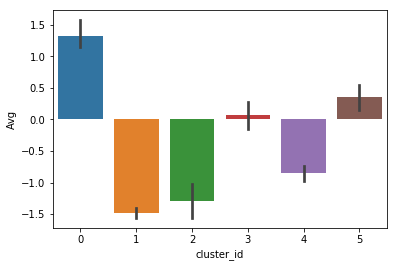

In [47]:
%matplotlib inline
sns.barplot(x=cricket_cluster.cluster_id, y=cricket_cluster.Avg)

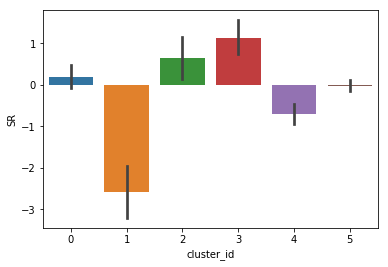

In [48]:
sns.barplot(x=cricket_cluster.cluster_id, y=cricket_cluster.SR)

In [50]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import matplotlib.pyplot as plt

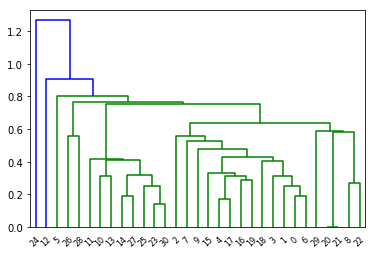

In [51]:
mergings = linkage(numeric_df[['SR','Avg']], method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

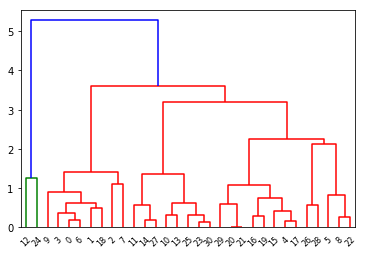

In [53]:
mergings = linkage(numeric_df[['SR','Avg']], method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [54]:
clusterCut_TT = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
cricket_cluster_cut = pd.concat([numeric_df, clusterCut_TT], axis=1)
#RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']
print("0 :",cricket_cluster_cut[cricket_cluster_cut[0]==0].SR.mean())
print("1 :",cricket_cluster_cut[cricket_cluster_cut[0]==1].SR.mean())
print("2 :",cricket_cluster_cut[cricket_cluster_cut[0]==2].SR.mean())
print("3 :",cricket_cluster_cut[cricket_cluster_cut[0]==3].SR.mean())
print("3 :",cricket_cluster_cut[cricket_cluster_cut[0]==4].SR.mean())
print("3 :",cricket_cluster_cut[cricket_cluster_cut[0]==5].SR.mean())

0 : 0.19062100945389515
1 : 0.23764963616928358
2 : 1.584218185629921
3 : -0.60532272442884
3 : -2.5827090384278812
3 : 0.9145900752056488


In [55]:
cricket_cluster_cut[cricket_cluster_cut[0]==0]

,Player,SR,Avg,0
0,Rohit Sharma,0.218819,1.301044,0
1,Sikhar Dhawan,0.418775,1.145874,0
2,Virat Kohli,0.384220,2.016755,0
3,Ambati Rayudu,-0.116254,1.464635,0
6,MS dhoni,0.193970,1.492903,0
7,Kedar Jadhav,0.936721,1.058064,0
9,Vijay Sankar,-0.480835,1.144069,0
18,Shaun Marsh,-0.030448,0.979877,0


In [56]:
cricket_cluster_cut[cricket_cluster_cut[0]==1]

,Player,SR,Avg,0
4,Lokesh Rahul,-0.078981,0.555864,1
15,Aron Finch,0.242891,0.641268,1
16,Alex Carey,-0.244382,0.081330,1
17,Usman Khawaja,-0.088687,0.385657,1
19,D Arcy Short,0.044488,0.101779,1
20,Peter Handscomb,0.737541,0.241914,1
21,Marcus Stoinis,0.737541,0.241914,1
29,Nathan Lyon,0.550786,-0.319227,1


In [57]:
cricket_cluster_cut[cricket_cluster_cut[0]==2]

,Player,SR,Avg,0
5,Rishab Pant,1.924468,-0.329452,2
8,Hardik pandya,1.316056,0.196204,2
22,Glenn Maxwell,1.512130,0.381447,2


In [58]:
cricket_cluster_cut[cricket_cluster_cut[0]==3]

,Player,SR,Avg,0
10,Kuldeep Yadav,-1.031784,-0.624156,3
11,Mohmmed Shami,0.133400,-1.016293,3
13,Yuzevendra Chahal,-1.210386,-0.880970,3
14,Bhuvneshwar Kumar,-0.327470,-0.667459,3
23,Jhye Richardson,-0.807366,-0.975997,3
25,Pat Cummins,-0.590714,-0.849093,3
27,Nathan Coulter-Nile,-0.243217,-0.840673,3
30,Adam Zampa,-0.765045,-1.113726,3


In [59]:
cricket_cluster_cut[cricket_cluster_cut[0]==4]

,Player,SR,Avg,0
12,Jasprit Bumrah,-1.954690,-1.397003,4
24,Ashton Turner,-3.210728,-1.562398,4


In [60]:
cricket_cluster_cut[cricket_cluster_cut[0]==5]

,Player,SR,Avg,0
26,Kane Richardson,1.157256,-1.291751,5
28,Jason Behrendoff,0.671924,-1.562398,5


In [61]:
clusterCut_t = cut_tree(mergings, n_clusters = 6)

In [62]:
ClusterID=pd.Series(clusterCut_t.reshape(-1,))
cricket_cluster_merge = pd.concat([numeric_df, ClusterID], axis=1)

In [63]:
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==0]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==1]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==2]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==3]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==4]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==5]))

8
8
3
8
2
2
